# Import Data

In [1]:
import numpy as np
import pandas as pd
import ast

data=pd.read_excel("https://docs.google.com/uc?id=1rwW3roc-ELRu-KDtau7NUz-GCF2M1yJJ")
for i in data.columns[6:9]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
for i in data.columns[10:13]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
print("type liste done")

avis_token
avis_token_correct
avis_token_correct_sw
avis_token_en
avis_token_correct_en
avis_token_correct_en_sw
type liste done


In [2]:
print(len(data))
df=data[data["avis_clean_final"].isnull()==False]
df=df[df["avis_clean_final_en"].isnull()==False]
len(df)

24105


24103

In [3]:
df=df.reset_index(drop=True)

In [4]:
df=pd.merge(df,pd.get_dummies(df['assureur'], prefix='assureur'), left_index=True, right_index=True).drop(columns=['assureur'])
df=pd.merge(df,pd.get_dummies(df['produit'], prefix='produit'), left_index=True, right_index=True).drop(columns=['produit'])

In [5]:
df["date_com_y"]=pd.DatetimeIndex(df['date_com']).year
df["date_com_m"]=pd.DatetimeIndex(df['date_com']).month
df["date_com_d"]=pd.DatetimeIndex(df['date_com']).day

df["date_xp_d"]=pd.DatetimeIndex(df['date_xp']).year
df["date_xp_d"]=pd.DatetimeIndex(df['date_xp']).month

df=df.drop(columns=['date_com','date_xp'])


In [6]:
# longueur commentaire
# nb mots
# nb ponctuation
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

df["nb_punct"]=df["avis"].apply(lambda x: count(x, string.punctuation))
df["nb_char"]=df["avis"].apply(lambda x: len(x))
df["nb_mots"]=df['avis_token'].apply(lambda x: len(x[0]))


In [7]:
df.columns

Index(['note', 'avis', 'avis_token', 'avis_token_correct',
       'avis_token_correct_sw', 'avis_en', 'avis_token_en',
       'avis_token_correct_en', 'avis_token_correct_en_sw', 'avis_clean_final',
       'avis_clean_final_en', 'assureur_AMV', 'assureur_APRIL',
       'assureur_APRIL Moto', 'assureur_AXA', 'assureur_Active Assurances',
       'assureur_Afer', 'assureur_Afi Esca', 'assureur_Ag2r La Mondiale',
       'assureur_Allianz', 'assureur_Assur Bon Plan', 'assureur_Assur O'Poil',
       'assureur_AssurOnline', 'assureur_CNP Assurances', 'assureur_Carac',
       'assureur_Cardif', 'assureur_Cegema Assurances',
       'assureur_Crédit Mutuel', 'assureur_Direct Assurance',
       'assureur_Eca Assurances', 'assureur_Euro-Assurance',
       'assureur_Eurofil', 'assureur_GMF', 'assureur_Gan', 'assureur_Generali',
       'assureur_Groupama', 'assureur_Génération',
       'assureur_Harmonie Mutuelle', 'assureur_Hiscox', 'assureur_Intériale',
       'assureur_L'olivier Assurance', 'assu

In [8]:
final=df.drop(columns=['avis', 'avis_token', 'avis_token_correct',
       'avis_token_correct_sw', 'avis_token_en',
       'avis_token_correct_en', 'avis_token_correct_en_sw', 'avis_clean_final',
       'avis_clean_final_en'])

## Embeddings et Sentiment Score

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
train_glove=pd.read_csv("/content/drive/MyDrive/PINCET_Bruno_NLP_Project_2/Vectorisation/train_review_glove.csv",sep=",",header=0)
train_w2v= pd.read_csv("https://drive.google.com/uc?id=1nKDFb6ZEo7y_rgaZB6BWlreAqqWM9cgJ",sep=",",header=0)
train_sentiment=pd.read_csv("/content/drive/MyDrive/PINCET_Bruno_NLP_Project_2/Sentiment/train_sentiment_score.csv",sep=",",header=0).iloc[:, 1:]

In [11]:
final=pd.merge(final,train_w2v, left_index=True, right_index=True)
final=pd.merge(final,train_glove.reset_index(),left_index=True, right_index=True)
final=pd.merge(final,train_sentiment.reset_index(),left_index=True, right_index=True)

<ipython-input-11-d30335fa456a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final=pd.merge(final,train_glove.reset_index(),left_index=True, right_index=True)


In [12]:
len(final.columns)

481

In [13]:
final

,note,avis_en,assureur_AMV,assureur_APRIL,assureur_APRIL Moto,assureur_AXA,assureur_Active Assurances,assureur_Afer,assureur_Afi Esca,assureur_Ag2r La Mondiale,...,93_y,94_y,95_y,96_y,97_y,98_y,99_y,index,bert_scores,vader_compound
0,5,"best insurance, price, solutions, listening, s...",0,0,0,0,0,0,0,0,...,-0.140502,0.119083,0.145925,-0.009067,-0.199668,0.030138,-0.052544,0,0.999785,0.8834
1,4,"i am generally satisfied, except that you have...",0,0,0,0,0,0,0,0,...,-0.019018,0.114189,-0.001465,-0.033510,-0.068481,-0.059315,0.007828,1,0.995292,0.5521
2,5,very affordable price several options are avai...,0,0,0,0,0,0,0,0,...,0.109892,0.015628,0.228390,-0.135483,-0.106096,-0.002397,0.014991,2,0.999562,0.5563
3,4,"i satisfy the service, a very fast response fr...",0,0,0,0,0,0,0,0,...,-0.176307,0.061455,-0.086604,0.061787,-0.197633,0.102601,-0.050771,3,0.994402,0.6705
4,1,"customer for more than 25 years, very disappoi...",0,0,0,0,0,0,0,0,...,-0.064365,0.161900,0.064813,-0.069028,-0.170925,-0.083993,-0.007467,4,0.081235,0.3119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,1,motorcycle insurance at the biker mutual in sh...,0,0,0,0,0,0,0,0,...,0.028840,0.077645,0.179132,-0.057556,-0.077357,0.078056,-0.072186,24098,0.140807,0.7701
24099,1,even the simplest requests do not succeed. imp...,0,0,0,0,0,0,0,0,...,-0.177516,0.156815,-0.015929,-0.009912,-0.257319,-0.119461,0.011908,24099,0.001398,-0.3875
24100,1,"in december 2019, i subscribed to a complement...",0,0,0,0,0,0,0,0,...,-0.105739,0.165955,0.097614,-0.031835,-0.218240,-0.048075,-0.026805,24100,0.136346,-0.5282
24101,3,i have insured the gmf for more than 15 years ...,0,0,0,0,0,0,0,0,...,-0.043213,0.174467,-0.041947,0.017037,-0.079614,-0.082807,0.008460,24101,0.101055,0.8519


In [14]:
print(final.columns.tolist())

['note', 'avis_en', 'assureur_AMV', 'assureur_APRIL', 'assureur_APRIL Moto', 'assureur_AXA', 'assureur_Active Assurances', 'assureur_Afer', 'assureur_Afi Esca', 'assureur_Ag2r La Mondiale', 'assureur_Allianz', 'assureur_Assur Bon Plan', "assureur_Assur O'Poil", 'assureur_AssurOnline', 'assureur_CNP Assurances', 'assureur_Carac', 'assureur_Cardif', 'assureur_Cegema Assurances', 'assureur_Crédit Mutuel', 'assureur_Direct Assurance', 'assureur_Eca Assurances', 'assureur_Euro-Assurance', 'assureur_Eurofil', 'assureur_GMF', 'assureur_Gan', 'assureur_Generali', 'assureur_Groupama', 'assureur_Génération', 'assureur_Harmonie Mutuelle', 'assureur_Hiscox', 'assureur_Intériale', "assureur_L'olivier Assurance", 'assureur_LCL', 'assureur_MAAF', 'assureur_MACIF', 'assureur_MAIF', 'assureur_MGP', 'assureur_MMA', 'assureur_Magnolia', 'assureur_Malakoff Humanis', 'assureur_Mapa', 'assureur_Matmut', 'assureur_Mercer', 'assureur_MetLife', 'assureur_Mgen', 'assureur_Mutuelle des Motards', 'assureur_Néolia

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final, test_size=0.2,random_state=42) 

X_train=train.iloc[:, 1:]
X_train2=train.iloc[:, 1:]

y_train= train.iloc[:, 0]

X_test=test.iloc[:, 1:]
X_test2=test.iloc[:, 1:]

y_test= test.iloc[:, 0]

# RNN - Embedding + Bi-LSTM

In [16]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [17]:
X_train2=X_train2.drop(columns=['avis_en']).values.tolist()
X_test2=X_test2.drop(columns=['avis_en']).values.tolist()

y_train=tf.convert_to_tensor(y_train, dtype=tf.float64)
y_test=tf.convert_to_tensor(y_test, dtype=tf.float64)



In [18]:
# Model parameters

max_len = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' 
vocab_size = 250
n_lstm = 128
drop_lstm = 0.2
num_epochs = 50
embedding_dim=16

In [19]:
# convert reviews to sequences of numbers

tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train["avis_en"])


training_sequences = tokenizer.texts_to_sequences(X_train["avis_en"])
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test["avis_en"])
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [20]:
# model creation

model1 = Sequential()
model1.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model1.add(Bidirectional(LSTM(n_lstm,return_sequences = False)))
model1.add(Dropout(drop_lstm))
model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 16)           4000      
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 152,737
Trainable params: 152,737
Non-trainable params: 0
_________________________________________________________________


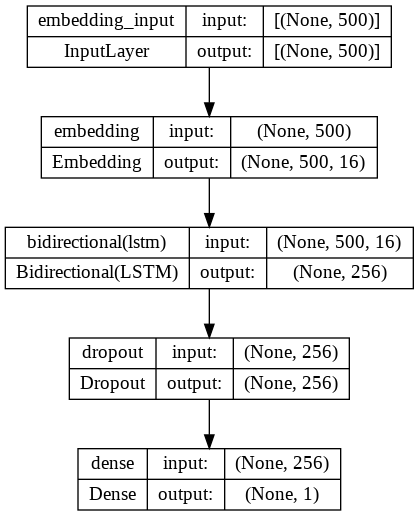

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(model1, show_shapes=True, show_layer_names=True)

In [22]:
model1.compile(optimizer= 'adam', loss='mse', metrics=['mse'])

early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4)

history = model1.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_test),
                     callbacks = [early_stop],
                     verbose = 2)

Epoch 1/50
603/603 - 31s - loss: 1.2908 - mse: 1.2908 - val_loss: 0.9125 - val_mse: 0.9125 - 31s/epoch - 52ms/step
Epoch 2/50
603/603 - 29s - loss: 0.9019 - mse: 0.9019 - val_loss: 0.8566 - val_mse: 0.8566 - 29s/epoch - 48ms/step
Epoch 3/50
603/603 - 27s - loss: 0.8680 - mse: 0.8680 - val_loss: 0.9210 - val_mse: 0.9210 - 27s/epoch - 44ms/step
Epoch 4/50
603/603 - 29s - loss: 0.8429 - mse: 0.8429 - val_loss: 0.8415 - val_mse: 0.8415 - 29s/epoch - 48ms/step
Epoch 5/50
603/603 - 26s - loss: 0.8185 - mse: 0.8185 - val_loss: 0.8234 - val_mse: 0.8234 - 26s/epoch - 44ms/step
Epoch 6/50
603/603 - 27s - loss: 0.8097 - mse: 0.8097 - val_loss: 0.8496 - val_mse: 0.8496 - 27s/epoch - 44ms/step
Epoch 7/50
603/603 - 27s - loss: 0.8179 - mse: 0.8179 - val_loss: 0.8601 - val_mse: 0.8601 - 27s/epoch - 44ms/step
Epoch 8/50
603/603 - 26s - loss: 0.7915 - mse: 0.7915 - val_loss: 0.8583 - val_mse: 0.8583 - 26s/epoch - 43ms/step
Epoch 9/50
603/603 - 26s - loss: 0.7702 - mse: 0.7702 - val_loss: 0.8148 - val_m

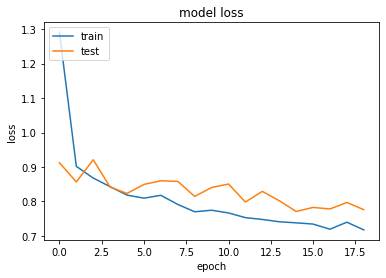

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
results = model1.evaluate(testing_padded, y_test, batch_size=128)
print(results)
rmse_r = np.sqrt(mean_squared_error(model1.predict(testing_padded[:]), y_test))
rmse_r

38/38 [==============================] - 1s 26ms/step - loss: 0.7763 - mse: 0.7763
[0.7763233184814453, 0.7763233184814453]
151/151 [==============================] - 3s 18ms/step


0.8810921395144062

# CNN - Embedding + Conv1D

In [25]:
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len))
model2.add(Conv1D(32, 3, padding='same',activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 16)           4000      
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           1568      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6,113
Trainable params: 6,113
Non-trainable params: 0
____________________________________________________

In [26]:
model2.compile(optimizer= 'adam', loss='mse', metrics=['mse'])

early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4)

history2 = model2.fit(training_padded,
                     y_train,
                     epochs = num_epochs,
                     validation_data = (testing_padded, y_test),
                     callbacks = [early_stop],
                     verbose = 2)

Epoch 1/50
603/603 - 4s - loss: 1.8741 - mse: 1.8741 - val_loss: 0.9919 - val_mse: 0.9919 - 4s/epoch - 6ms/step
Epoch 2/50
603/603 - 2s - loss: 0.8925 - mse: 0.8925 - val_loss: 0.9163 - val_mse: 0.9163 - 2s/epoch - 4ms/step
Epoch 3/50
603/603 - 2s - loss: 0.8381 - mse: 0.8381 - val_loss: 0.8759 - val_mse: 0.8759 - 2s/epoch - 4ms/step
Epoch 4/50
603/603 - 2s - loss: 0.8057 - mse: 0.8057 - val_loss: 0.8687 - val_mse: 0.8687 - 2s/epoch - 4ms/step
Epoch 5/50
603/603 - 2s - loss: 0.7814 - mse: 0.7814 - val_loss: 0.8503 - val_mse: 0.8503 - 2s/epoch - 4ms/step
Epoch 6/50
603/603 - 2s - loss: 0.7564 - mse: 0.7564 - val_loss: 0.8484 - val_mse: 0.8484 - 2s/epoch - 4ms/step
Epoch 7/50
603/603 - 2s - loss: 0.7359 - mse: 0.7359 - val_loss: 0.8463 - val_mse: 0.8463 - 2s/epoch - 4ms/step
Epoch 8/50
603/603 - 2s - loss: 0.7181 - mse: 0.7181 - val_loss: 0.8428 - val_mse: 0.8428 - 2s/epoch - 4ms/step
Epoch 9/50
603/603 - 2s - loss: 0.6998 - mse: 0.6998 - val_loss: 0.8438 - val_mse: 0.8438 - 2s/epoch - 4

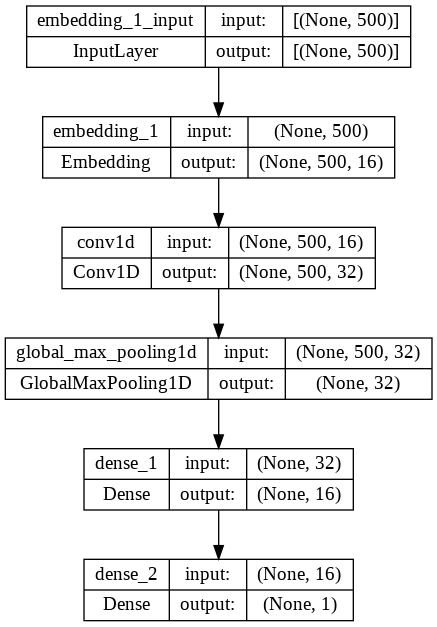

In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model2, show_shapes=True, show_layer_names=True)

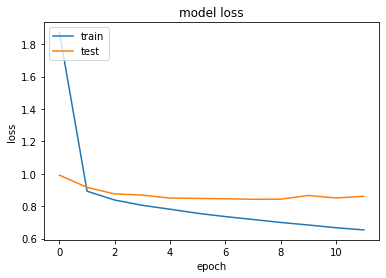

In [28]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
results = model2.evaluate(testing_padded, y_test, batch_size=128)
print(results)
rmse_r = np.sqrt(mean_squared_error(model2.predict(testing_padded[:]), y_test))
rmse_r

38/38 [==============================] - 0s 3ms/step - loss: 0.8613 - mse: 0.8613
[0.8612560033798218, 0.8612560033798218]
151/151 [==============================] - 0s 1ms/step


0.9280387740262833

# Combining numerical and text features

In [30]:
from keras.models import Model, Sequential
from keras.layers import Normalization, concatenate


model3 = Sequential()
model3.add(Embedding(vocab_size,
                     embedding_dim,
                     input_length = max_len,
                     input_shape=(500,)))
model3.add(Bidirectional(LSTM(n_lstm,return_sequences = False)))
model3.add(Dropout(drop_lstm))

model4 = Sequential()
model4.add(Normalization(input_shape=(479,)))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))


model_concat = concatenate([model3.output, model4.output], axis=-1)
model_concat = Dense(1, activation='linear')(model_concat)
model_merged = Model(inputs=[model3.input, model4.input], outputs=model_concat)

In [31]:
model_merged.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 normalization_input (InputLaye  [(None, 479)]       0           []                               
 r)                                                                                               
                                                                                                  
 embedding_2_input (InputLayer)  [(None, 500)]       0           []                               
                                                                                                  
 normalization (Normalization)  (None, 479)          959         ['normalization_input[0][0]']    
                                                                                                  
 embedding_2 (Embedding)        (None, 500, 16)      4000        ['embedding_2_input[0][0]']  

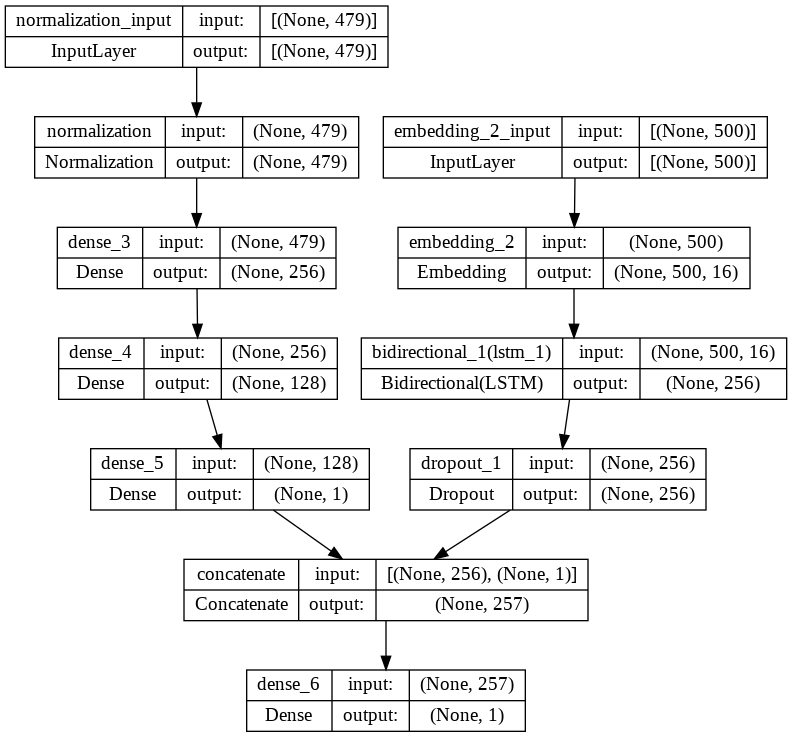

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model_merged, show_shapes=True, show_layer_names=True)

In [33]:
model_merged.compile(optimizer= 'adam', loss='mse', metrics=['mse'])

early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4)

history_merged= model_merged.fit([training_padded, np.array(X_train2)], y_train,
                                  callbacks = [early_stop],
                                  epochs = num_epochs,
                                  validation_data = ([testing_padded,np.array(X_test2)], y_test),
                                  verbose = 2)

Epoch 1/50
603/603 - 32s - loss: 1.3845 - mse: 1.3845 - val_loss: 0.9667 - val_mse: 0.9667 - 32s/epoch - 52ms/step
Epoch 2/50
603/603 - 27s - loss: 0.9451 - mse: 0.9451 - val_loss: 0.8979 - val_mse: 0.8979 - 27s/epoch - 45ms/step
Epoch 3/50
603/603 - 30s - loss: 0.8780 - mse: 0.8780 - val_loss: 0.8391 - val_mse: 0.8391 - 30s/epoch - 50ms/step
Epoch 4/50
603/603 - 28s - loss: 0.8364 - mse: 0.8364 - val_loss: 0.8291 - val_mse: 0.8291 - 28s/epoch - 47ms/step
Epoch 5/50
603/603 - 28s - loss: 0.8366 - mse: 0.8366 - val_loss: 0.9002 - val_mse: 0.9002 - 28s/epoch - 46ms/step
Epoch 6/50
603/603 - 27s - loss: 0.8079 - mse: 0.8079 - val_loss: 0.8491 - val_mse: 0.8491 - 27s/epoch - 46ms/step
Epoch 7/50
603/603 - 28s - loss: 0.7899 - mse: 0.7899 - val_loss: 0.8270 - val_mse: 0.8270 - 28s/epoch - 46ms/step
Epoch 8/50
603/603 - 28s - loss: 0.7842 - mse: 0.7842 - val_loss: 0.8222 - val_mse: 0.8222 - 28s/epoch - 46ms/step
Epoch 9/50
603/603 - 28s - loss: 0.7851 - mse: 0.7851 - val_loss: 0.8426 - val_m

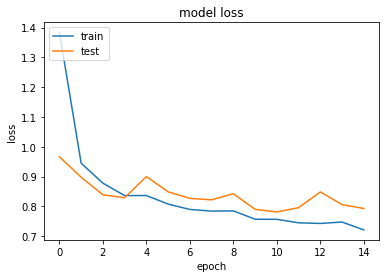

In [34]:
plt.plot(history_merged.history['loss'])
plt.plot(history_merged.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
results = model_merged.evaluate([testing_padded,np.array(X_test2)], y_test, batch_size=128)
print(results)
rmse_r = np.sqrt(mean_squared_error(model_merged.predict([testing_padded[:],np.array(X_test2)]), y_test))
rmse_r

38/38 [==============================] - 1s 34ms/step - loss: 0.7930 - mse: 0.7930
[0.7930150628089905, 0.7930150628089905]
151/151 [==============================] - 6s 31ms/step


0.8905139914736048